# COVID-19 Data Analysis based on the Tokyo 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from IPython.display import display
import requests

In [14]:
"""
get file from open data source 
https://catalog.data.metro.tokyo.lg.jp/dataset/t000010d0000000068/resource/c2d997db-1450-43fa-8037-ebb11ec28d4c

"""

URL = 'https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv'
receiveData = requests.get(URL, allow_redirects=True)

open('RawData/covid-19-infectedPersonData.csv', 'wb').write(receiveData.content)


114337

In [53]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
df = pd.read_csv('RawData/covid-19-infectedPersonData.csv', sep=',', parse_dates=['公表_年月日'])
df = df.fillna(0)
df = df.replace('男性','M')
df = df.replace('女性','F')
df = df.replace('代', '')
df = df.replace('不明', '-1')
df = df.replace('調査中', '-2')

for i in range(len(df.index)):
    buf = df.iloc[i,8]
    id = buf.find('代')
   
    if(id > 0):
        buf = buf[:id]
        df.iloc[i,8] = buf 
        
    id = buf.find('歳未満')
   
    if(id > 0):
        buf = '0'
        df.iloc[i,8] = buf 

    
df.iloc[:,8] = df.iloc[:,8].astype('float')    
display(df)
display(df.dtypes)

,﻿No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,曜日,発症_年月日,患者_居住地,患者_年代,患者_性別,患者_属性,患者_状態,患者_症状,患者_渡航歴の有無フラグ,備考,退院済フラグ
0,1,130001,東京都,0.0,2020-01-24,金,0.0,湖北省武漢市,40.0,M,0.0,0.0,0.0,0.0,0.0,1.0
1,2,130001,東京都,0.0,2020-01-25,土,0.0,湖北省武漢市,30.0,F,0.0,0.0,0.0,0.0,0.0,1.0
2,3,130001,東京都,0.0,2020-01-30,木,0.0,湖南省長沙市,30.0,F,0.0,0.0,0.0,0.0,0.0,1.0
3,4,130001,東京都,0.0,2020-02-13,木,0.0,都内,70.0,M,0.0,0.0,0.0,0.0,0.0,0.0
4,5,130001,東京都,0.0,2020-02-14,金,0.0,都内,50.0,F,0.0,0.0,0.0,0.0,0.0,1.0
5,6,130001,東京都,0.0,2020-02-14,金,0.0,都内,70.0,M,0.0,0.0,0.0,0.0,0.0,1.0
6,7,130001,東京都,0.0,2020-02-15,土,0.0,都内,80.0,M,0.0,0.0,0.0,0.0,0.0,1.0
7,8,130001,東京都,0.0,2020-02-15,土,0.0,都内,50.0,F,0.0,0.0,0.0,0.0,0.0,1.0
8,9,130001,東京都,0.0,2020-02-15,土,0.0,都内,50.0,M,0.0,0.0,0.0,0.0,0.0,1.0
9,10,130001,東京都,0.0,2020-02-15,土,0.0,都内,70.0,M,0.0,0.0,0.0,0.0,0.0,1.0


﻿No                      int64
全国地方公共団体コード              int64
都道府県名                   object
市区町村名                  float64
公表_年月日          datetime64[ns]
曜日                      object
発症_年月日                 float64
患者_居住地                  object
患者_年代                  float64
患者_性別                   object
患者_属性                  float64
患者_状態                  float64
患者_症状                  float64
患者_渡航歴の有無フラグ           float64
備考                     float64
退院済フラグ                 float64
dtype: object

0    2020-01-24
1    2020-01-25
2    2020-01-30
3    2020-02-13
4    2020-02-14
5    2020-02-15
6    2020-02-16
7    2020-02-18
8    2020-02-19
9    2020-02-21
10   2020-02-22
11   2020-02-24
12   2020-02-26
13   2020-02-27
14   2020-02-29
15   2020-03-01
16   2020-03-03
17   2020-03-04
18   2020-03-05
19   2020-03-06
20   2020-03-07
21   2020-03-10
22   2020-03-11
23   2020-03-12
24   2020-03-13
25   2020-03-14
26   2020-03-15
27   2020-03-17
28   2020-03-18
29   2020-03-19
30   2020-03-20
31   2020-03-21
32   2020-03-22
33   2020-03-23
34   2020-03-24
35   2020-03-25
36   2020-03-26
37   2020-03-27
38   2020-03-28
39   2020-03-29
40   2020-03-30
41   2020-03-31
42   2020-04-01
43   2020-04-02
44   2020-04-03
45   2020-04-04
46   2020-04-05
47   2020-04-06
48   2020-04-07
49   2020-04-08
50   2020-04-09
51   2020-04-10
Name: 公表_年月日, dtype: datetime64[ns]

array([ 2.94658926,  0.10349451, -4.23608932])

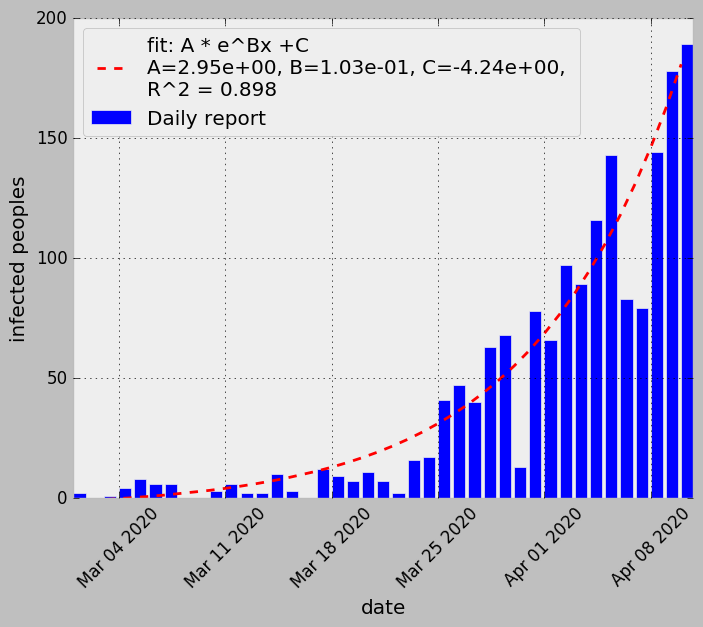

In [143]:
initalDayID = 15

def func(x, a,b,c):
    return a*np.exp(b*x)+c

dates = df.iloc[:,4].drop_duplicates()
dates = dates.reset_index(drop = True)
display(dates)

array = np.array([])

for date in dates[initalDayID:]:
    df_tmp = df[df['公表_年月日'] == date]
    td = date-dates[initalDayID]   
    
    if len(array) == 0:
        array = np.array([[date, td.days, len(df_tmp.index)]])
    else:
        array = np.append(array, np.array([[date, td.days, len(df_tmp.index)]]), axis= 0)        
#display(array)

x = array[:,0]
y = array[:,2].astype('float')
xdata = array[:,1].astype('float')

popt, pcov = curve_fit(func, xdata, y)

display(popt)


ydata = func(xdata, *popt)
R2 = r2_score(y, ydata)

plt.style.use('bmh')
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('infected peoples')
plt.ylim([0,200])

plt.bar(x,y, label = "Daily report")
plt.plot(x, func(xdata, *popt), ls = '--', c = 'red' ,
            label='fit: A * e^Bx +C\nA=%3.2e, B=%3.2e, C=%3.2e, \nR^2 = %2.3f' % (popt[0],popt[1],popt[2], R2))
plt.legend(loc = 'best')
plt.show()


